<a href="https://colab.research.google.com/github/selfor21/COM420/blob/main/COM520_Desafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01- COM520 - Aprendizado Profundo

## Desafio - Semana 04

### Autoencoders com o MNIST

- Carregamento dos pacotes necessários
- Carregamento dos dados (MNIST)
- Modelo Raso
- Modelo Profundo

<!-- Observações: 
- ativar a GPU (Menu [Runtime], opção [Change runtime type])
- Sem GPU, a execução deste caderno pode levar mais de 40 minutos. -->


## 1.1- Autoencoders

<img src="https://blog.keras.io/img/ae/autoencoder_schema.jpg">

Estrutura padrão de um autoencoder:
- Camada de Codificação (Encoder)
- Camada de Decodificação (Decoder)
- Espaço Latente

Fonte (imagem e código): https://blog.keras.io/building-autoencoders-in-keras.html



## 1.2- Pacotes

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras.datasets as kds

import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas utilizadas para projeção / redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA

## 1.3- Carregamento dos dados (MNIST)

### MNIST-Fashion

Fonte: https://en.wikipedia.org/wiki/MNIST_database

No Keras: https://keras.io/api/datasets/mnist/


<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">



In [11]:
num_classes = 10
input_shape = (28, 28, 1)

# Carga dos dados (keras.datasets)
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Normalização das features
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


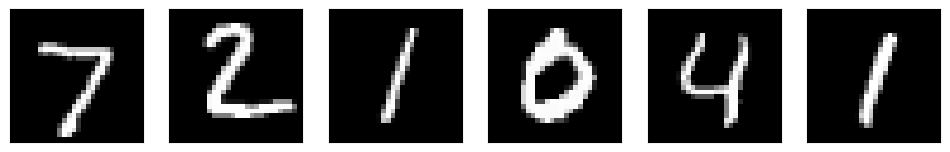

In [3]:
plt.figure(figsize=(12, 8))
for i in range(6):
    ax = plt.subplot(1, 6, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 02- Autoencoder profundo


## Definição do Modelo

In [7]:
encoding_dim = 12

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder02 = keras.Model(input_img, decoded)
autoencoder02.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 12)                780       
                                                                 
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1011

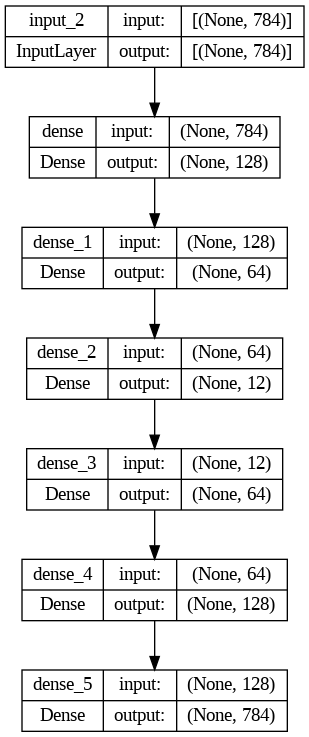

In [8]:
tf.keras.utils.plot_model(autoencoder02, show_shapes=True)

## Criação dos modelos Encoder e Decoder

In [9]:
encoder02 = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder02.layers[-3] # número de camada da saída até a codificação latente
decoder02 = keras.Model(encoded_input, decoder_layer(encoded_input))

## Treinamento do Autoencoder

In [16]:
autoencoder02.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder02.fit(x_train, x_train,
                            epochs=100,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),                  
                            verbose=1) # usar 1 ou 2 para observar a evolucão por época

Epoch 1/100
235/235 [==============================] - 4s 6ms/step - loss: 0.2667 - val_loss: 0.1868
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1725 - val_loss: 0.1625
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1580 - val_loss: 0.1488
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1459 - val_loss: 0.1419
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1405 - val_loss: 0.1371
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1368 - val_loss: 0.1339
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1341 - val_loss: 0.1321
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1322 - val_loss: 0.1304
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1306 - val_loss: 0.1290
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1293 - val_lo

## Avaliação

313/313 [==============================] - 1s 2ms/step


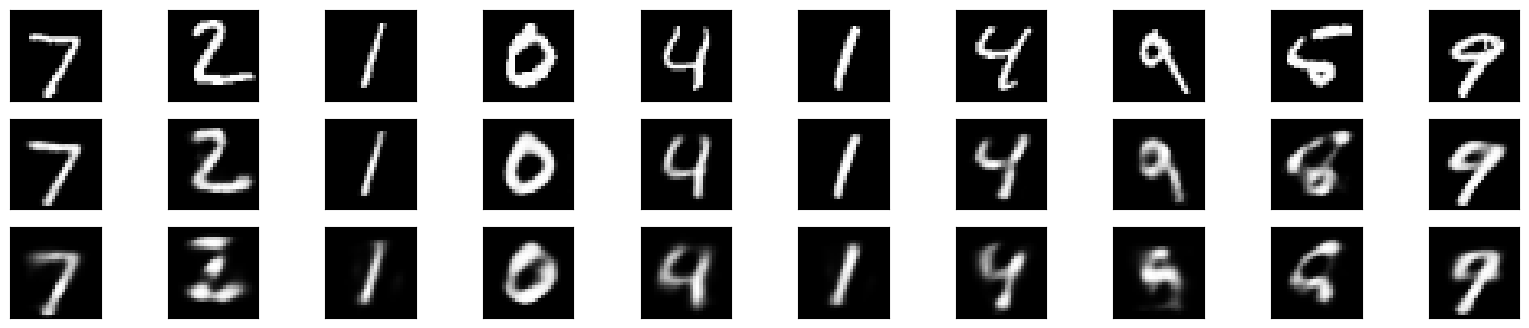

In [17]:
decoded_imgs02 = autoencoder02.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs02[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction (raso)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs01[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Projeção PCA

40/40 [==============================] - 0s 2ms/step


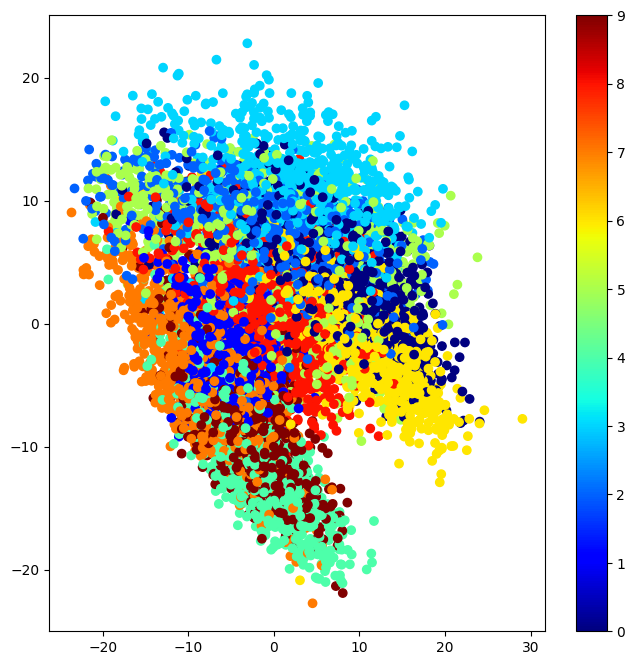

In [18]:
x_test_encoded = encoder02.predict(x_test, batch_size=256)

x_emb = PCA(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

### Projeção t-SNE

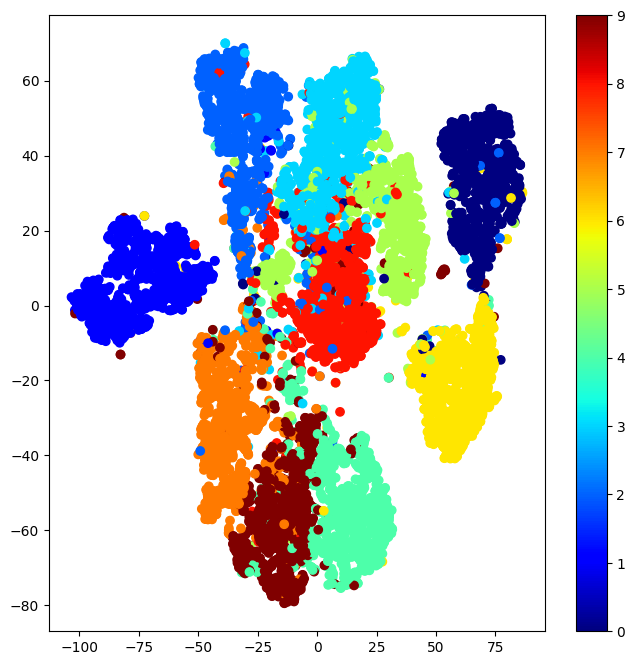

In [19]:
x_emb = TSNE(n_components=2).fit_transform(x_test_encoded)

plt.figure(figsize=(8, 8))
plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_test, cmap=plt.cm.jet)
plt.colorbar()
plt.show()

# 03- Desafio - AutoEncoder Convolucional Profundo

## Definição do Modelo

In [5]:
input_img = keras.Input(shape=(28,28,1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

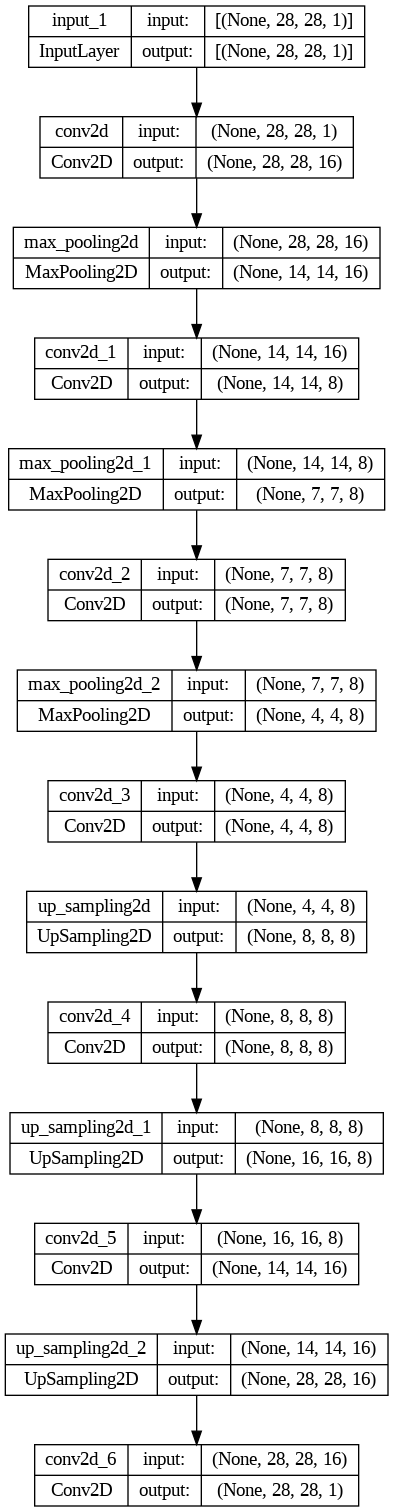

In [6]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

## Treinamento

In [13]:
from keras.callbacks import TensorBoard

In [15]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
                            #verbose=1) # usar 1 ou 2 para observar a evolucão por época

Epoch 1/50
235/235 [==============================] - 96s 401ms/step - loss: 0.3001 - val_loss: 0.1749
Epoch 2/50
235/235 [==============================] - 92s 391ms/step - loss: 0.1562 - val_loss: 0.1432
Epoch 3/50
235/235 [==============================] - 122s 519ms/step - loss: 0.1376 - val_loss: 0.1322
Epoch 4/50
235/235 [==============================] - 109s 466ms/step - loss: 0.1289 - val_loss: 0.1252
Epoch 5/50
235/235 [==============================] - 96s 411ms/step - loss: 0.1237 - val_loss: 0.1212
Epoch 6/50
235/235 [==============================] - 102s 436ms/step - loss: 0.1200 - val_loss: 0.1173
Epoch 7/50
235/235 [==============================] - 93s 397ms/step - loss: 0.1172 - val_loss: 0.1150
Epoch 8/50
235/235 [==============================] - 93s 397ms/step - loss: 0.1149 - val_loss: 0.1125
Epoch 9/50
235/235 [==============================] - 92s 391ms/step - loss: 0.1129 - val_loss: 0.1107
Epoch 10/50
235/235 [==============================] - 91s 389ms/step 

## Avaliação

313/313 [==============================] - 6s 19ms/step


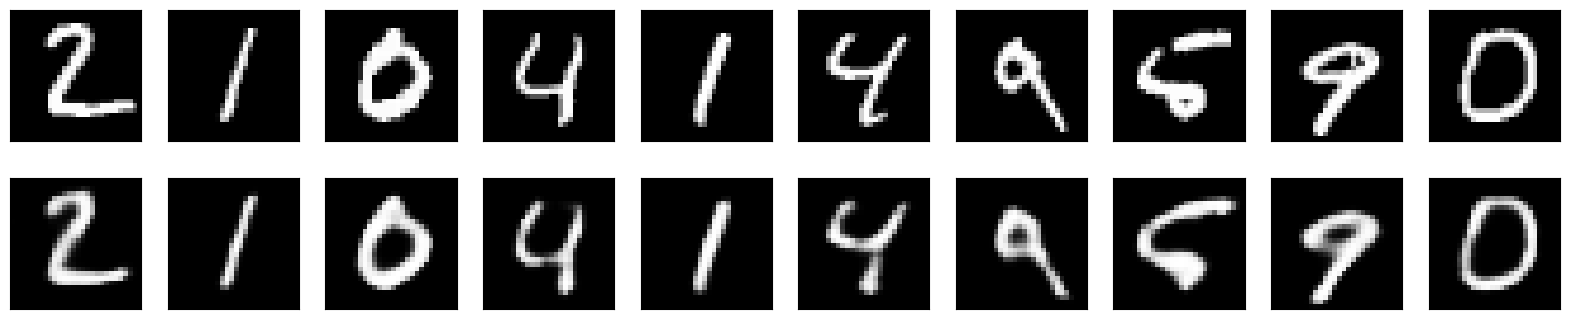

In [17]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Imagens visualizadas
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
        